# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

###Import the libraries

In [ ]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

###Import the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Project datasets/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

###Understand the data

In [ ]:
# first 5 rows in the data

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# number of rows and columns in the data

df.shape

(381109, 12)

In [ ]:
# features in the data

df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# statistical description the data

df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [ ]:
# basic information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


###Check for Missing Values

In [ ]:
# check for missing values

df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

###Observations:

1. There are no Missing Values.

###Exploratory Data Analysis

###Target Feature = Response

In [ ]:
# frequency of each Response

df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


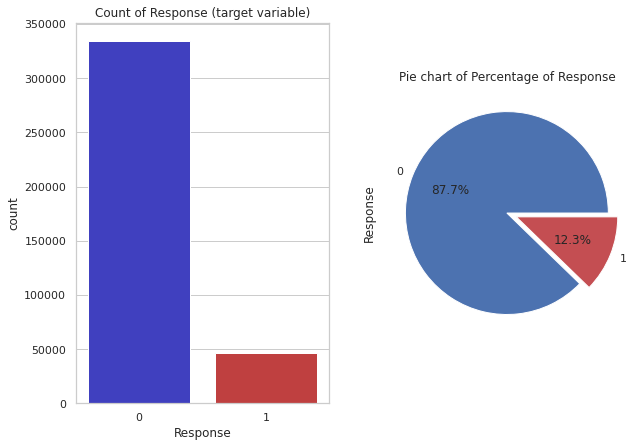

In [ ]:
# plottinf the frequeny of each Response

plt.subplot(1, 2, 1)
sns.countplot(df['Response'], palette=['blue','red'], saturation=0.5)
plt.title("Count of Response (target variable)")

# pie chart for percentage of Response

plt.subplot(1,2,2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%', colors=['b','r'], figsize = (10,7),explode = [0,0.1],title = "Pie chart of Percentage of Response")

print( "Percentage of target class\n")
print(df['Response'].value_counts()/len(df)*100)

###Observations:

1. By the plot, we can say that this is the problem of imbalance binary classification problem.

2. The individuals who are interested is 12.3 %.

###Age Distribution of Customers

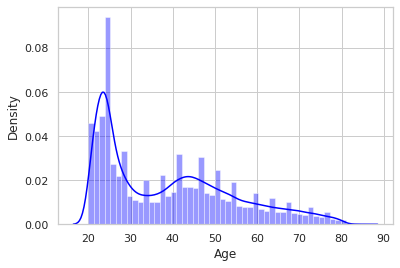

In [ ]:
# Age distribution of Customers

sns.distplot(df.Age, color='blue')

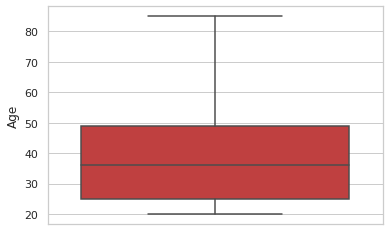

In [ ]:
# boxplot to detect outliers in Age feature 

sns.boxplot(y = 'Age', data = df, color='red', saturation=0.5)

###Observations:

1. Count of the indivisuals with age 24 are greater in the dataset.

2. Variable Age looks like right skewed.

3. From the boxplot we observe that there are not much outliers in the data.

###Age Vs Annual premium

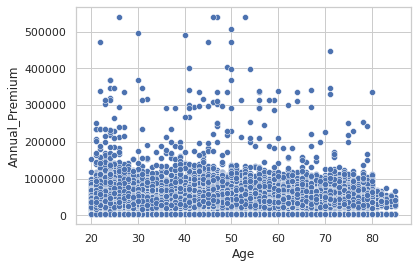

In [ ]:
# scatterplot for Age vs Annual Premium

sns.scatterplot(x=df['Age'],y=df['Annual_Premium'])

###Gender and Response

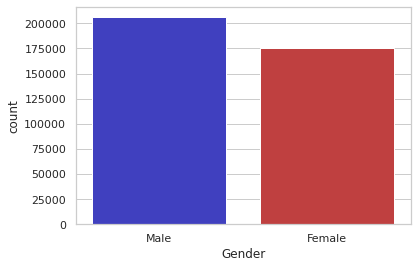

In [ ]:
# Response with respect to Gender

sns.countplot(df.Gender, palette=['blue','red'], saturation=0.5)

In [ ]:
# grouping Gender and Response

df1 = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

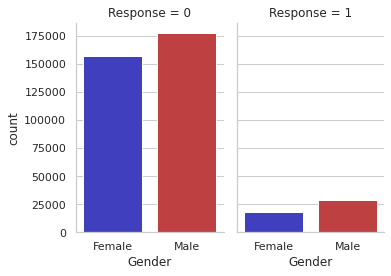

In [ ]:
# Male and Female who have Response 1 and 0

g = sns.catplot(x="Gender", y="count",col="Response",
                data=df1, 
                kind="bar",
                height=4, 
                aspect=.7,
                palette=['blue','red'],
                saturation=0.5)

###Observations:

1. The gender variable in the dataset is almost equally distributed.

2. Male category is slightly greater than that of female and chances of buying the insurance is also little high.

###Driving license by Gender

In [ ]:
# percentage of Customers having Driving License

print("Percentage of  Driving_License feature\n ")
print(df['Driving_License'].value_counts()/len(df)*100)

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


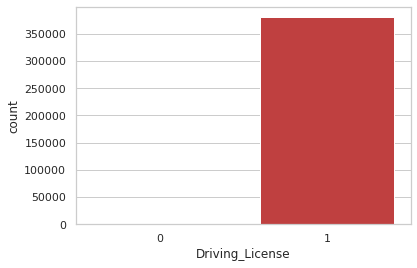

In [ ]:
# plot for Customers who have Driving License

sns.countplot(df.Driving_License, palette=['blue','red'], saturation=0.5)

In [ ]:
# grouping Gender and Driving License

df1 = df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [ ]:
df1

,Gender,Driving_License
0,Female,175020
1,Male,206089


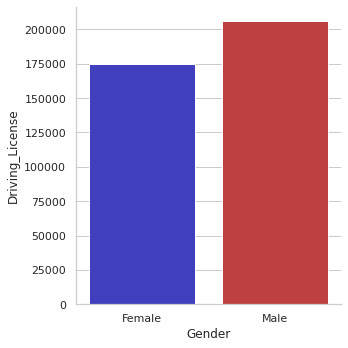

In [ ]:
# plot for Customers having Driving License with respect to Gender

sns.catplot(x="Gender", y="Driving_License",
                data=df1, 
                kind="bar",
                palette=['blue','red'],
                saturation=0.5)

###Observations:

1. Customers who have the DL are 99%.

2. Customers who are interested in Vehicle Insurance almost all have driving license.

###Customers having Vehicle insurance already

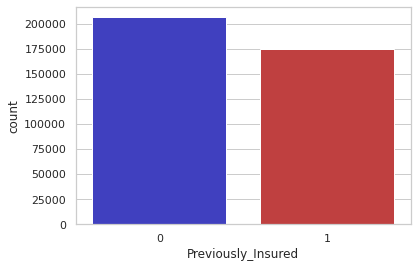

In [ ]:
# plot for Customers who already have vehicle Insurance

sns.countplot(df.Previously_Insured, palette=['blue','red'], saturation=0.5)

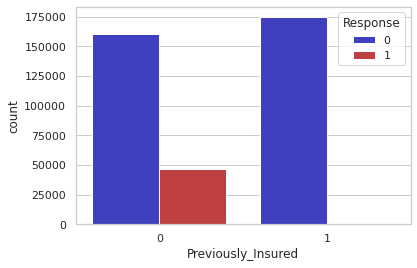

In [ ]:
# plot for Customers who already have Insurance with respect to their Response

sns.countplot('Previously_Insured', hue='Response', data=df, palette=['blue','red'], saturation=0.5)

###Observations:

1. Customers who are insured already and not insured have equal count.

2. Customers who are not previously insured are likely to be interested.

###Vehicle Age

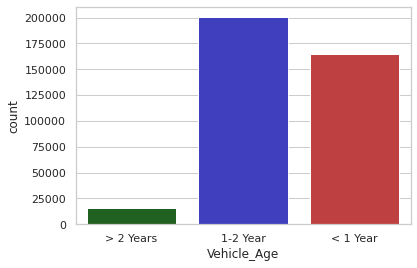

In [ ]:
# plot for count of Vehicle with given Age

sns.countplot(df.Vehicle_Age, palette=['green','blue','red'], saturation=0.5)

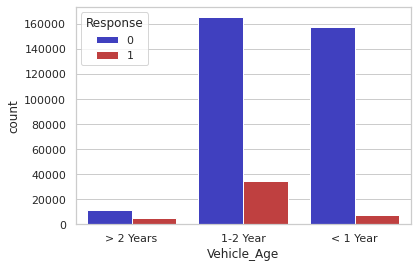

In [ ]:
# plot of Age of Vehicle with respect Response 

sns.countplot('Vehicle_Age', hue = 'Response',data=df, palette=['blue','red'], saturation=0.5)

###Observations:

1. There is very less number of customers with vechicle age less than 2 years.

2. Customers with vechicle age 1-2 years are more likely to interested as compared to the other two

###Response and Vehicle age

In [ ]:
# grouping the Vehicle Age and Response

df1 = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df1

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


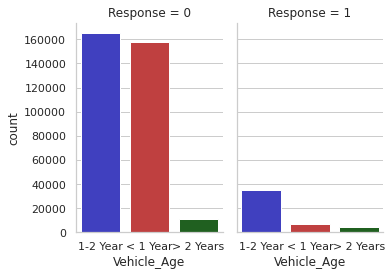

In [ ]:
# plot for Vehicle Age and the Response of Customers

g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df1, 
                kind="bar",
                height=4, 
                aspect=.7,
                palette=['blue','red','green'],
                saturation=0.5)

###Customers having damaged vehicle

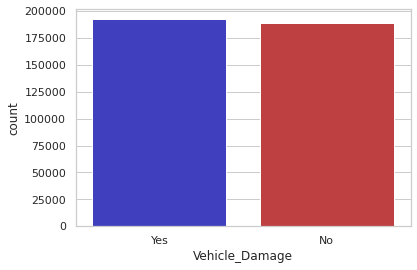

In [ ]:
# plot of count of Vehicles that are already Damaged

sns.countplot(df.Vehicle_Damage, palette=['blue','red'], saturation=0.5)

###Damage Vehicle and Response

In [ ]:
# grouping Vehicle Damage and Response

df1 = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

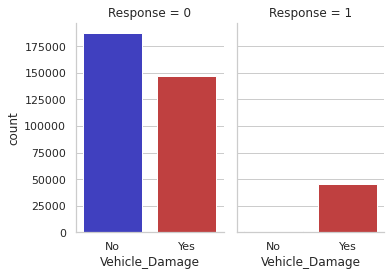

In [ ]:
# plot for Customers whose Vehicle is Damaged and want Insurance

g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df1, 
                kind="bar",
                height=4, 
                aspect=.7,
                palette=['blue','red'],
                saturation=0.5);

###Observations:

1. Customers with vechicle damage(Yes and NO) are equally distributed with (50.48 % , 49.51 %).

2. Customers with vechicle damage are more interested in Vehicle Insurance.

###Annual Premium Distribution

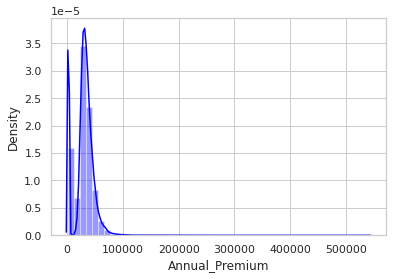

In [ ]:
# Distribution of Annual Premium

sns.distplot(df.Annual_Premium, color='blue')

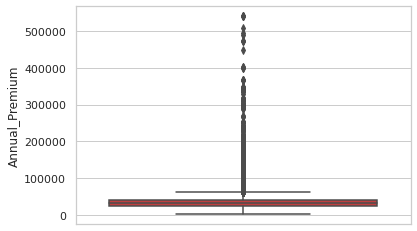

In [ ]:
# boxplot to detect if outliers are present in Annual Premium

sns.boxplot(y='Annual_Premium', data = df, palette=['red'], saturation=0.5)

###Observations:

1. From the distribution plot we can infer that the annual premimum variable is right skewed.

2. From the boxplot we can observe that there are a lot of outliers in the Annual Premium data.

###Vintage

Number of Days, Customer has been associated with the company

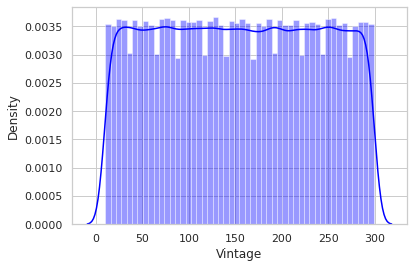

In [ ]:
# distribution plot for vintage

sns.distplot(df.Vintage, color='blue')

###Region Code

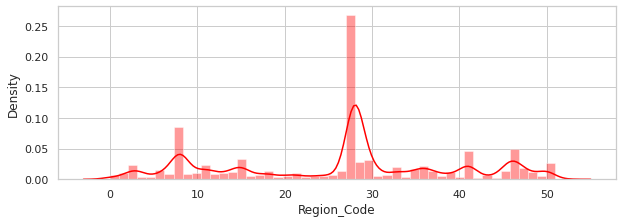

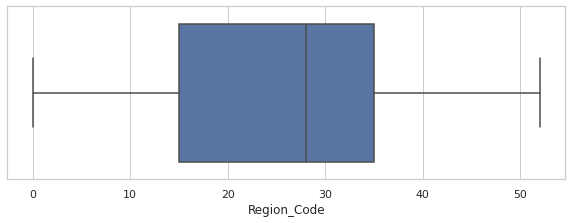

In [ ]:
# distribution plot for Region Code

plt.figure(figsize=(10,7))
plt.subplot(2,1,1)
sns.distplot(df['Region_Code'], color='red')

# boxplot to detect if outliers are present in Region Code

plt.figure(figsize=(10,7))
plt.subplot(2,1,2)
sns.boxplot(df['Region_Code'])
plt.show()

###Observations:

1. Region code 28 the highest number of Responses.

2. From the box plot it looks like there is no outliers in the Region Code data.

3. Further we can analyze which region has highest intrested customers.

###Correlation in the data

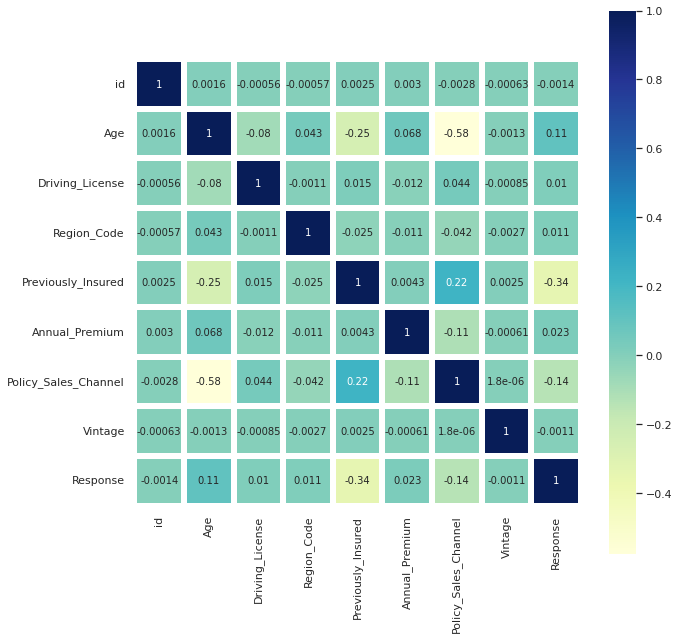

In [ ]:
# checking Correlation between features

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=5, annot=True, square=True, annot_kws={'size': 10}, cmap='YlGnBu')

###Observations:

1. From the correlation plot we observe that policy sales channel has slightly greater correlation with Age variable, this may be the indication of multicollinearity.

2. In classification, multicollinearity does not create a problem in prediction but in interpretation of importance of features

##Data Preprocessing

In [ ]:
# encode labels of multiple columns at ones using LabelEncoder

from sklearn.preprocessing import LabelEncoder

df_le = df.apply(LabelEncoder().fit_transform)

In [ ]:
df_le.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,24,1,28,0,2,1,23593,24,207,1
1,1,1,56,1,3,0,0,0,16675,24,173,0
2,2,1,27,1,28,0,2,1,21433,24,17,1
3,3,1,1,1,11,1,1,0,11758,145,193,0
4,4,0,9,1,41,1,1,0,10635,145,29,0


In [ ]:
# Scale the numerical features

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# using MinMaxScaler for Age and Vintage

mm = MinMaxScaler()

num_feat = ['Age', 'Vintage']
df_le[num_feat] = mm.fit_transform(df_le[num_feat])

# using RobustScaler for Annual Premium as it has outliers

rs = RobustScaler()

df_le[['Annual_Premium']] = rs.fit_transform(df_le[['Annual_Premium']])

In [ ]:
# dropping the column id

df_le = df_le.drop('id',axis=1)

In [ ]:
df_le.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,1,28,0,2,1,0.585901,24,0.716263,1
1,1,0.861538,1,3,0,0,0,0.124516,24,0.598616,0
2,1,0.415385,1,28,0,2,1,0.441843,24,0.058824,1
3,1,0.015385,1,11,1,1,0,-0.203415,145,0.667820,0
4,0,0.138462,1,41,1,1,0,-0.278311,145,0.100346,0


###Split the Data in train and test set

In [ ]:
# define the dependent variable

y = df_le['Response']

# define the independent variable

X = df_le.drop(['Response'], axis = 1)

In [ ]:
# split the train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
X_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(304887, 10) (76222, 10) (304887,) (76222,)


###Logistic Regression (basic model)

In [ ]:
# import libraries for Logistic Regression

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, roc_auc_score, classification_report, recall_score, precision_score, f1_score, confusion_matrix

In [ ]:
# run the LogisticRegession model and analyse its performance metrics

lr = LogisticRegression()
lr.random_state = 78

# fit Logistic Regression and make predictions

lr.fit(X_train,y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

# accuracy score

train_accuracy = accuracy_score(y_train, pred_train)
print('train accuracy: ', train_accuracy)

# classification report

report = classification_report(pred_test, y_test, output_dict=True)
model_classification_rep = pd.DataFrame(report).T

print('classification report:')
print(model_classification_rep)

# confusion matrix

print('confusion matrix:')
print(confusion_matrix(y_test, pred_test))

# ROC AUC score

pred_proba = lr.predict_proba(X_test)[:, 1]
print('ROC AUC Score: {}'.format(roc_auc_score(y_test,pred_proba)))

train accuracy:  0.8767248193593036
classification report:
              precision    recall  f1-score       support
0              0.998848  0.876924  0.933924  76140.000000
1              0.000533  0.060976  0.001057     82.000000
accuracy       0.876046  0.876046  0.876046      0.876046
macro avg      0.499691  0.468950  0.467490  76222.000000
weighted avg   0.997774  0.876046  0.932920  76222.000000
confusion matrix:
[[66769    77]
 [ 9371     5]]
ROC AUC Score: 0.8177534655007552


##Data Modelling and Evaluation

In [ ]:
# import the required libraries

!pip install catboost
!pip install ipywidgets
from catboost import CatBoostClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

import time

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 16.9 MB/s 


In [ ]:
# declaring the classification models

models = [
           ['LogisticRegression: ',                     LogisticRegression()],
           ['CatBoostClassifier:' ,                     CatBoostClassifier()],
           ['DecisionTree: ',                           DecisionTreeClassifier(random_state=42)],
           ['RandomForest: ',                           RandomForestClassifier(random_state=42)],
           ['GradientBoostingClassifier: ',              GradientBoostingClassifier(random_state=42)],
           ['KNeighborsClassifier: ',                   neighbors.KNeighborsClassifier()]
]

In [ ]:
# run the classification models 

model_data = []
for name, curr_model in models:
    curr_model_data = {}
    curr_model.random_state = 78
    
    # fit the model

    curr_model.fit(X_train,y_train)
    
    # make predictions of train set
    
    pred_train = curr_model.predict(X_train)

    # make predictions on the test set

    pred_test = curr_model.predict(X_test)
    
    # accuracy score

    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)

    # precision score

    precision_train = precision_score(y_train, pred_train)
    precision_test = precision_score(y_test, pred_test)

    # recall score

    recall_train = recall_score(y_train, pred_train)
    recall_test = recall_score(y_test, pred_test)
    
    # AUC ROC score

    y_score_train = curr_model.predict_proba(X_train)[:,1]
    fpr, tpr, _ = roc_curve(y_train, y_score_train)
    auc_train = auc(fpr,tpr)

    pred_proba = curr_model.predict_proba(X_test)[:, 1]
    roc_auc_test = roc_auc_score(y_test,pred_proba)

    curr_model_data["Model"] = name
    curr_model_data["Accuracy_train"] = accuracy_train 
    curr_model_data["Precision_train"] = precision_train 
    curr_model_data["Recall_train"] = recall_train 
    curr_model_data["ROC_AUC_train"] = auc_train
    curr_model_data["Accuracy_test"] = accuracy_test
    curr_model_data["Precision_test"] = precision_test
    curr_model_data["Recall_test"] = recall_test
    curr_model_data["ROC_AUC_test"] = roc_auc_test

    # append the data into a list

    model_data.append(curr_model_data)

Learning rate set to 0.118484
0:	learn: 0.5022413	total: 98.4ms	remaining: 1m 38s
1:	learn: 0.4218894	total: 143ms	remaining: 1m 11s
2:	learn: 0.3601437	total: 202ms	remaining: 1m 7s
3:	learn: 0.3277386	total: 251ms	remaining: 1m 2s
4:	learn: 0.3085848	total: 299ms	remaining: 59.6s
5:	learn: 0.2969414	total: 348ms	remaining: 57.7s
6:	learn: 0.2895744	total: 396ms	remaining: 56.2s
7:	learn: 0.2846376	total: 446ms	remaining: 55.3s
8:	learn: 0.2810345	total: 494ms	remaining: 54.4s
9:	learn: 0.2782518	total: 542ms	remaining: 53.7s
10:	learn: 0.2763290	total: 588ms	remaining: 52.9s
11:	learn: 0.2748015	total: 635ms	remaining: 52.3s
12:	learn: 0.2732998	total: 687ms	remaining: 52.2s
13:	learn: 0.2724556	total: 733ms	remaining: 51.6s
14:	learn: 0.2717398	total: 785ms	remaining: 51.5s
15:	learn: 0.2709665	total: 905ms	remaining: 55.6s
16:	learn: 0.2703777	total: 1.03s	remaining: 59.4s
17:	learn: 0.2699599	total: 1.1s	remaining: 59.8s
18:	learn: 0.2696079	total: 1.15s	remaining: 59.2s
19:	learn

In [ ]:
model_data

[{'Model': 'LogisticRegression: ',
  'Accuracy_train': 0.8767248193593036,
  'Precision_train': 0.0802675585284281,
  'Recall_train': 0.0006428456634702952,
  'ROC_AUC_train': 0.8173460133113881,
  'Accuracy_test': 0.8760462858492298,
  'Precision_test': 0.06097560975609756,
  'Recall_test': 0.0005332764505119454,
  'ROC_AUC_test': 0.8177534655007552},
 {'Model': 'CatBoostClassifier:',
  'Accuracy_train': 0.8824843302600636,
  'Precision_train': 0.7650581190560056,
  'Recall_train': 0.058177532544061716,
  'ROC_AUC_train': 0.881551392256217,
  'Accuracy_test': 0.8767022644380887,
  'Precision_test': 0.4820846905537459,
  'Recall_test': 0.031569965870307165,
  'ROC_AUC_test': 0.8570296510322386},
 {'Model': 'DecisionTree: ',
  'Accuracy_train': 0.9998852033704291,
  'Precision_train': 1.0,
  'Recall_train': 0.9990625167407725,
  'ROC_AUC_train': 0.9999999386814686,
  'Accuracy_test': 0.8235548791687439,
  'Precision_test': 0.2966550174737893,
  'Recall_test': 0.31687286689419797,
  'ROC

In [ ]:
# dataframe for scores of different models

model_data = pd.DataFrame(model_data)
model_data

,Model,Accuracy_train,Precision_train,Recall_train,ROC_AUC_train,Accuracy_test,Precision_test,Recall_test,ROC_AUC_test
0,LogisticRegression:,0.876725,0.080268,0.000643,0.817346,0.876046,0.060976,0.000533,0.817753
1,CatBoostClassifier:,0.882484,0.765058,0.058178,0.881551,0.876702,0.482085,0.031570,0.857030
2,DecisionTree:,0.999885,1.000000,0.999063,1.000000,0.823555,0.296655,0.316873,0.605861
3,RandomForest:,0.999879,0.999705,0.999304,1.000000,0.865682,0.363261,0.122120,0.834617
4,GradientBoostingClassifier:,0.877574,0.750000,0.000321,0.856785,0.876991,0.500000,0.000213,0.856994
5,KNeighborsClassifier:,0.896890,0.644939,0.351422,0.920065,0.853809,0.327408,0.178754,0.760020


###Observations:

1. Accuracy of all the models is very close to each other.

2. Precision of the model GradientBoostingClassifier is the highest.

3. Recall for all the models is low because it is an imbalanced data.

4. ROC AUC score of the models CatBoostClassifier and GradientBoostingClassifier are better.

###Let us perform Hyper Parameter Tuning for CatBoostClassifier and RandomForest.

###Choose AUC ROC score as the performance metric.

###CatBoost classifier

In [ ]:
# categorical features

cat_col=['Gender','Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# define parameters for hyperparameter tuning

params = {'depth':[3,6,9],
          'iterations':[250,500,750],
          'learning_rate':[0.3,0.03,0.003],
          'eval_metric':['AUC'],
          'border_count':[5,10,20],
          'l2_leaf_reg':[1]
        }

In [ ]:
# perform hyperparameter tuning using RandomizedSearchCV

clf = CatBoostClassifier()

cb_model = RandomizedSearchCV(estimator = clf, 
                                param_distributions = params, 
                                n_iter = 10, 
                                cv = 3, 
                                verbose= 50, 
                                random_state= 101, 
                                n_jobs = -1)

# fit the model with tuned parameters on the training set

cb_model.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	total: 49.5ms	remaining: 24.7s
1:	total: 92.6ms	remaining: 23.1s
2:	total: 140ms	remaining: 23.2s
3:	total: 187ms	remaining: 23.2s
4:	total: 237ms	remaining: 23.4s
5:	total: 288ms	remaining: 23.7s
6:	total: 337ms	remaining: 23.7s
7:	total: 385ms	remaining: 23.7s
8:	total: 435ms	remaining: 23.7s
9:	total: 482ms	remaining: 23.6s
10:	total: 535ms	remaining: 23.8s
11:	total: 586ms	remaining: 23.8s
12:	total: 644ms	remaining: 24.1s
13:	total: 693ms	remaining: 24.1s
14:	total: 745ms	remaining: 24.1s
15:	total: 794ms	remaining: 24s
16:	total: 843ms	remaining: 23.9s
17:	total: 895ms	remaining: 24s
18:	total: 947ms	remaining: 24s
19:	total: 999ms	remaining: 24s
20:	total: 1.05s	remaining: 23.9s
21:	total: 1.09s	remaining: 23.6s
22:	total: 1.13s	remaining: 23.5s
23:	total: 1.18s	remaining: 23.5s
24:	total: 1.23s	remaining: 23.4s
25:	total: 1.28s	remaining: 23.3s
26:	total: 1.33s	remaining: 23.2s
27:	total: 1.37s	remaining: 23.1s
28:

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f383f7a1390>,
                   n_jobs=-1,
                   param_distributions={'border_count': [5, 10, 20],
                                        'depth': [3, 6, 9],
                                        'eval_metric': ['AUC'],
                                        'iterations': [250, 500, 750],
                                        'l2_leaf_reg': [1],
                                        'learning_rate': [0.3, 0.03, 0.003]},
                   random_state=101, verbose=50)

In [ ]:
# best parameters for the model

cb_model.best_params_

{'learning_rate': 0.03,
 'l2_leaf_reg': 1,
 'iterations': 500,
 'eval_metric': 'AUC',
 'depth': 6,
 'border_count': 5}

In [ ]:
cb_model.best_score_

0.8776661517217854

In [ ]:
# fit the model with the best parameters

best_params=cb_model.best_params_

cat = CatBoostClassifier(**best_params)

cat.fit(X_train, y_train,
        cat_features=cat_col,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50,
        verbose=50)

0:	test: 0.8347147	best: 0.8347147 (0)	total: 285ms	remaining: 2m 22s
50:	test: 0.8527793	best: 0.8527793 (50)	total: 10.2s	remaining: 1m 29s
100:	test: 0.8563365	best: 0.8563365 (100)	total: 19.2s	remaining: 1m 15s
150:	test: 0.8570917	best: 0.8570917 (150)	total: 28.8s	remaining: 1m 6s
200:	test: 0.8576590	best: 0.8576590 (200)	total: 37.9s	remaining: 56.4s
250:	test: 0.8579565	best: 0.8579565 (250)	total: 47.3s	remaining: 46.9s
300:	test: 0.8582003	best: 0.8582014 (299)	total: 56.7s	remaining: 37.5s
350:	test: 0.8583222	best: 0.8583222 (350)	total: 1m 5s	remaining: 28s
400:	test: 0.8583669	best: 0.8583767 (395)	total: 1m 14s	remaining: 18.5s
450:	test: 0.8584048	best: 0.8584155 (434)	total: 1m 24s	remaining: 9.15s
499:	test: 0.8584443	best: 0.8584488 (494)	total: 1m 33s	remaining: 0us

bestTest = 0.8584487794
bestIteration = 494

Shrink model to first 495 iterations.


In [ ]:
# make predictions using the model with the best parameters

y_pred=cat.predict(X_test)

In [ ]:
# ROC AUC score with the model having best parameters

pred_proba = cat.predict_proba(X_test)[:, 1]
print('CatBoost ROC AUC SCORE: {}'.format(roc_auc_score(y_test,pred_proba)))

CatBoost ROC AUC SCORE: 0.8584487793960526


###Observation:

1. ROC AUC score has improved from 0.856173 to 0.858495

In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66846
           1       0.54      0.01      0.01      9376

    accuracy                           0.88     76222
   macro avg       0.71      0.50      0.47     76222
weighted avg       0.84      0.88      0.82     76222



In [ ]:
# confusion matrix

confusion_matrix(y_test, y_pred)

array([[66805,    41],
       [ 9328,    48]])

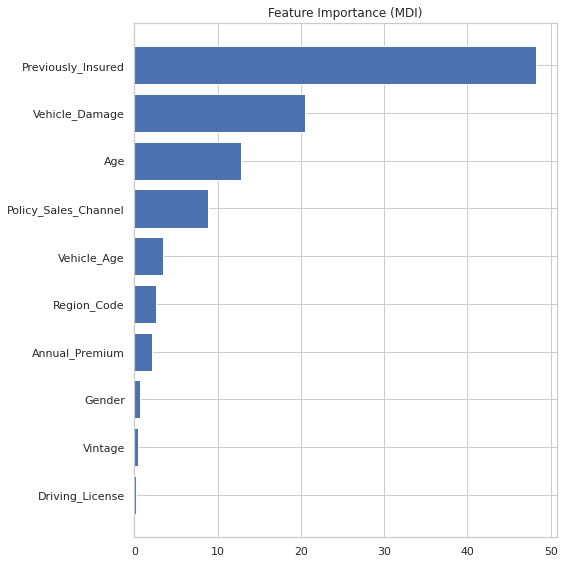

In [ ]:
# plot for feature importance

from sklearn.inspection import permutation_importance

# get feature importance data using feature_importances_ attribute

feature_importance = cat.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# plot the feature importance

fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(cat, X_test, y_test, 
                                n_repeats=10,
                                random_state=100, 
                                n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig.tight_layout()
plt.show()

###Observations:

1. The important features in the classification are Previously Insured, Vehicle Damage, Age.

In [ ]:
# precision, recall and threshold

precision, recall, th = precision_recall_curve(y_test, y_pred)

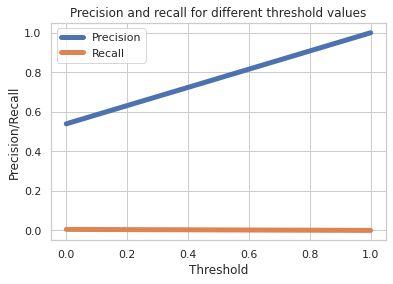

In [ ]:
# plot Precision and Recall with respect to Threshold

plt.plot(th, precision[1:], label="Precision",linewidth=5) 
plt.plot(th, recall[1:], label="Recall",linewidth=5) 
plt.title('Precision and recall for different threshold values') 
plt.xlabel('Threshold') 
plt.ylabel('Precision/Recall') 
plt.legend() 
plt.show()

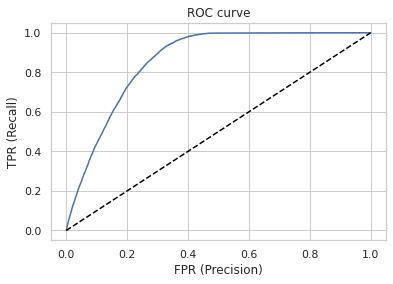

Area under curve (AUC):  0.8584487793960526


In [ ]:
# plot ROC curve

y_score = cat.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

plt.figure()
plt.title('ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))